In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list of tuples.
coordinates = list(lat_lngs)


In [12]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-26.476886628338875 99.55149551626562
-57.667162758385636 94.15850861544396
-48.636726891698174 -106.30576122332052
-33.17148856799513 -76.0787812264361
64.38846385911526 -45.50224848397053
-89.53613617948153 153.6009927342334
-2.597568264614509 -85.82526372281885
34.23444036558591 152.85701975068218
-8.067993334774869 161.89485871458328
-77.78031923654254 -33.41577451776402
-31.981573560375097 -10.962515004910756
-19.56667508694099 -54.684857272420544
-73.91075785447907 148.93582150447884
19.435967215083636 97.564048334272
-58.665202143308825 50.16747409880281
83.61332848999166 -134.43372594749815
-12.661163126157248 64.17680523677842
-17.812374668276206 -85.55246142006139
-66.89055510849653 -41.31569690078652
-83.46560948374565 44.205052074128275
62.37553312225063 129.0628032757524
17.37993548579341 9.001861664293642
75.88102043062074 55.32768421113374
5.008887034686751 -8.615886099382152
-25.945539032377454 -26.711494067047
-61.085638546462285 -170.34182112470674
70.21851553421868 -

29.891162749151434 9.151187386234966
87.92523549266704 -107.60008832091258
-46.812039271199595 86.4332792061254
85.35735235865658 113.06675533944667
-27.571710907293664 -108.75713967253064
66.23297020425511 136.87682229425064
-80.64040025941398 -152.2669647588303
-4.801694260220586 -52.5295498814925
52.30242281714004 -38.751393036014406
-36.89405176506431 -8.233853991527326
44.67675964381482 -24.52371446193129
-63.3761468704958 23.98709929784087
-69.2658703773439 -18.71078945016623
-80.64924560964198 93.22588344735823
-40.92849014639727 -19.541432083849145
41.72167105183084 -83.0658773058887
8.143375793426344 -13.118290807355038
-5.9441760667524335 -79.42971028539051
-36.15978163229552 -64.39042361057474
41.25590861238149 31.38208461097406
82.54185040768442 -167.70144417774222
85.39437082918681 35.986473317177996
46.43321685541261 70.49414081486293
84.80464926229325 120.00107697335153
37.40652164588849 80.97515644994269
86.72361514456418 64.43409910898956
-25.734404307149077 155.359406

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | auki
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | camapua
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | mae hong son
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | grand gaube
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | magan
Processing Record 21 of Set 1 | agadez
Processing Record 22 of Set 1 | belushya guba
City not fou

Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | nave
Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | baykit
Processing Record 42 of Set 4 | cabedelo
Processing Record 43 of Set 4 | moron
Processing Record 44 of Set 4 | erenhot
Processing Record 45 of Set 4 | charters towers
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | dulce grande
Processing Record 48 of Set 4 | najran
Processing Record 49 of Set 4 | flin flon
Processing Record 50 of Set 4 | chone
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | uthal
Processing Record 5 of Set 5 | puerto del rosario
Processing Record 6 of Set 5 | subiaco
Processing Record 7 of Set 5 | flinders
Processing Record 8 of Set 5 | siderno
Processing Record 9 of Set 5 | hirara
Processing Record 10 of Set 5 | mokrousovo
Processing Record 11 of Set 5 | padang
Processing Record 12 of

Processing Record 28 of Set 8 | ambon
Processing Record 29 of Set 8 | patacamaya
Processing Record 30 of Set 8 | astana
Processing Record 31 of Set 8 | lavumisa
Processing Record 32 of Set 8 | port blair
Processing Record 33 of Set 8 | vilyuysk
Processing Record 34 of Set 8 | clyde river
Processing Record 35 of Set 8 | cap malheureux
Processing Record 36 of Set 8 | bonga
Processing Record 37 of Set 8 | khormuj
City not found. Skipping...
Processing Record 38 of Set 8 | lakatoro
Processing Record 39 of Set 8 | sinnamary
Processing Record 40 of Set 8 | llanes
Processing Record 41 of Set 8 | prince rupert
Processing Record 42 of Set 8 | fairview
Processing Record 43 of Set 8 | kattivakkam
Processing Record 44 of Set 8 | verkhoyansk
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | mme
City not found. Skipping...
Processing Record 47 of Set 8 | santarem
Processing Record 48 of Set 8 | bundoran
Processing Record 49 of Set 8 | bathsheba
Processing Record 50 of Set 8 | sai

Processing Record 17 of Set 12 | quatre cocos
Processing Record 18 of Set 12 | brufut
Processing Record 19 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 20 of Set 12 | sao miguel do araguaia
Processing Record 21 of Set 12 | te anau
Processing Record 22 of Set 12 | sangmelima
Processing Record 23 of Set 12 | ongandjera
Processing Record 24 of Set 12 | mega
Processing Record 25 of Set 12 | dolores
Processing Record 26 of Set 12 | hami
Processing Record 27 of Set 12 | villa carlos paz
Processing Record 28 of Set 12 | tacuarembo
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | ponta delgada
Processing Record 31 of Set 12 | lakselv
Processing Record 32 of Set 12 | mount pleasant
Processing Record 33 of Set 12 | hervey bay
Processing Record 34 of Set 12 | simoes
Processing Record 35 of Set 12 | ballstad
City not found. Skipping...
Processing Record 36 of Set 12 | kousseri
Processing Record 37 of Set 12 | rosarito
Processing Record 38 of Se

In [15]:
len(city_data)

569

In [16]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,66.97,50,0,14.45,AU,2022-08-07 02:41:45
1,Busselton,-33.6500,115.3333,57.76,64,3,8.90,AU,2022-08-07 02:41:45
2,Castro,-24.7911,-50.0119,52.63,97,100,6.53,BR,2022-08-07 02:41:46
3,Constitucion,-35.3333,-72.4167,51.82,91,82,18.68,CL,2022-08-07 02:41:46
4,Qaqortoq,60.7167,-46.0333,43.00,94,66,4.74,GL,2022-08-07 02:41:46
5,Bluff,-46.6000,168.3333,42.80,53,99,14.43,NZ,2022-08-07 02:41:47
6,San Cristobal,7.7669,-72.2250,69.98,92,97,2.21,VE,2022-08-07 02:41:44
7,Nemuro,43.3236,145.5750,64.38,91,100,14.65,JP,2022-08-07 02:41:47
8,Auki,-8.7676,160.7034,85.48,65,56,2.42,SB,2022-08-07 02:41:47
9,Ushuaia,-54.8000,-68.3000,33.46,80,0,1.14,AR,2022-08-07 02:38:11


In [17]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp",
                  "Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2022-08-07 02:41:45,-24.8667,113.6333,66.97,50,0,14.45
1,Busselton,AU,2022-08-07 02:41:45,-33.6500,115.3333,57.76,64,3,8.90
2,Castro,BR,2022-08-07 02:41:46,-24.7911,-50.0119,52.63,97,100,6.53
3,Constitucion,CL,2022-08-07 02:41:46,-35.3333,-72.4167,51.82,91,82,18.68
4,Qaqortoq,GL,2022-08-07 02:41:46,60.7167,-46.0333,43.00,94,66,4.74
5,Bluff,NZ,2022-08-07 02:41:47,-46.6000,168.3333,42.80,53,99,14.43
6,San Cristobal,VE,2022-08-07 02:41:44,7.7669,-72.2250,69.98,92,97,2.21
7,Nemuro,JP,2022-08-07 02:41:47,43.3236,145.5750,64.38,91,100,14.65
8,Auki,SB,2022-08-07 02:41:47,-8.7676,160.7034,85.48,65,56,2.42
9,Ushuaia,AR,2022-08-07 02:38:11,-54.8000,-68.3000,33.46,80,0,1.14


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

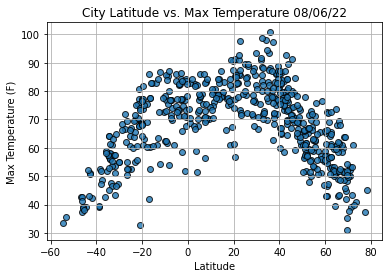

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

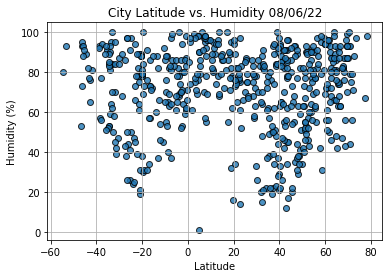

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

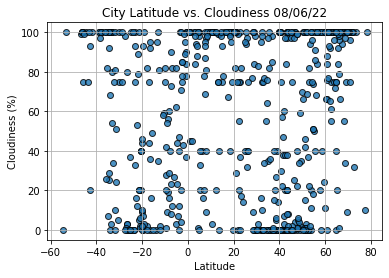

In [23]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

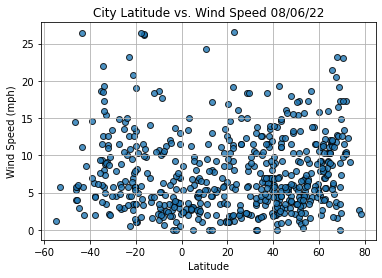

In [24]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()